# ANKIT KUMAR-Multiple Linear Regression titanic dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

>Load the Titanic dataset.

In [2]:
# Load the dataset
df = pd.read_csv(r"D:\Downloads\titanic dataset.csv")

>Display the first few rows of the dataset.

In [3]:
# Display first few rows
print(df.head())

   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S   
1  female  38.0      1      0          PC 17599  71.2833   C85        C   
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S   
3  female  35.0      1      0            113803  53.1000  C123        S   
4    male  35.0      0      0            373450   8.0500   NaN        S   

   Survived  
0         0  
1         1  
2         1  
3         1  
4         0  


>Drop irrelevant columns that won’t contribute to the model (e.g., passenger name, ticket number, etc.).

In [4]:
# Drop irrelevant columns
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'], axis=1, inplace=True)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Sex       1309 non-null   object 
 2   Age       1046 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Fare      1308 non-null   float64
 6   Embarked  1307 non-null   object 
dtypes: float64(2), int64(3), object(2)
memory usage: 71.7+ KB


>Handle missing values appropriately (e.g., imputing or dropping rows/columns).

In [6]:
# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

>Convert categorical features (e.g., Sex, Embarked) into numerical values using techniques like one-hot encoding.

In [7]:
# Convert categorical variables to numerical
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Drop rows where Fare is missing
df = df.dropna(subset=['Fare'])

>features and targets

In [8]:
# Define features and target
X = df.drop('Fare', axis=1)
y = df['Fare']

>Split the data into training and testing sets using an 80-20 ratio.

In [9]:
# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

>Create and train a multiple linear regression model using the training set.

In [10]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

>Use the trained model to predict the fare on the test set.

In [11]:
# Predict the fares on the test set
y_pred = model.predict(X_test)

>Interpret the coefficients of the model to understand the impact of each feature on the predicted fare

In [12]:
# Coefficients interpretation
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("\nFeature Coefficients:\n", coefficients)


Feature Coefficients:
       Feature  Coefficient
0      Pclass   -32.041842
1         Age    -0.037848
2       SibSp     6.347662
3       Parch     8.904208
4    Sex_male    -7.151531
5  Embarked_Q   -12.694048
6  Embarked_S   -18.866987


>Plot the actual vs. predicted fares to visualize the performance of your model.

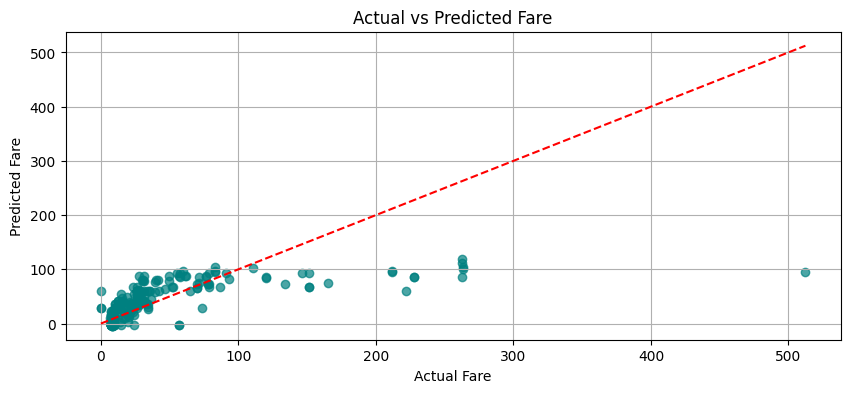

In [13]:
# Plotting Actual vs Predicted Fares
plt.figure(figsize=(10,4))
plt.scatter(y_test, y_pred, alpha=0.7, color='teal')
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Actual vs Predicted Fare')
plt.plot([0, max(y)], [0, max(y)], color='red', linestyle='--')
plt.grid(True)
plt.show()

>**Evaluation**

In [14]:
# Performance evaluation
print("\nMean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error: 2019.3800339597706
R² Score: 0.40794337652109613


**Actual vs Predicted Fare – Analysis**

The scatter plot above shows a comparison between the actual fare values (from the dataset) and the predicted fare values generated by the machine learning model. This kind of plot is commonly used to visually assess the performance of a regression model.

X-axis: Actual Fare (true values from the dataset)

Y-axis: Predicted Fare (values predicted by the model)

Blue dots: Individual data points comparing actual vs predicted values

Red dashed line (y = x): Ideal line representing perfect predictions (i.e., where predicted fare = actual fare)



# Interpretation of the Plot
**Accurate predictions lie close to the red line:**

A majority of the points lie relatively close to the red dashed line in the lower fare range (0–150), suggesting the model is doing reasonably well in predicting fares in that range.

**Poor performance on higher fare values:**

As the actual fare increases beyond 150, the predicted values do not rise accordingly. The model tends to underpredict high fares, with several points showing actual fares above 200 while the predicted values remain near or below 100.
👉 This indicates that the model is underfitting in the higher fare range and may not be capturing complex patterns in the data.

**Presence of outliers:**

A few points are located far from the ideal line, particularly at the higher fare end (e.g., actual fare around 500 but predicted much lower). These outliers suggest either unusual cases in the data or limitations in the model's ability to generalize.